# Codigo Ejercicio 1
## Integrantes 
* Gatica Isaias
* Martin Santiago
* Saez Lautaro Andres
* Vidman Xavier

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, fftshift,fftfreq
plt.rcParams.update( { 'font.size':20, 'figure.figsize': (16,9), 'savefig.dpi': 120 } )


### calcular_fft recibe como parametros una señal x, escrita como funcion y N, el cual puede ser un entero que hace referencia al numero de muestras de x con el que se calcula la fft o un vector, para el ultimo caso se aplica el algoritmo de calcular fft para cada elemento de N.
### Dicha funcion retorna un diccionario que contiene la fft que posee los siguientes atributos:
* Ns: solo en el caso de que N sea un vector e indica cuantas muestras se utilizaron para calcular la fft
* X: contiene los valores de la fft
* shift_X: contiene la version centrada de la fft de x
* freq: posee las frecuencias de la fft

In [2]:
def calcular_fft( x, N ):
    if( type(N) != int ):
        valores = {
            'Ns': [],
            'X': [],
            'shift_X': [],
            'freq': []
        }
        for N_ in N:
            resultado = calcular_fft( x, N_ )
            valores['X'].append( resultado['X'] )
            valores['shift_X'].append( resultado['shift_X'] )
            valores['freq'].append( resultado['freq'] )
            valores['Ns'].append( N_ )
    
    else:
        n = np.arange( 0, N, 1 )
        X = fft( x(n) ) / N
        freq = fftfreq( N )
        valores = {
            'X': X,
            'shift_X': fftshift( X ),
            'freq': fftshift(freq) 
        }
    
    return valores

## b) y c)

In [3]:
x = lambda n: np.sin( np.pi * n / 4 )
N = [8, 9]
Xs = calcular_fft( x, N )
X = [[], []]
f = [[], []]
X[0] = Xs['X'][0]
X[1] = Xs['X'][1]
f[0] = Xs['freq'][0]
f[1] = Xs['freq'][1]

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


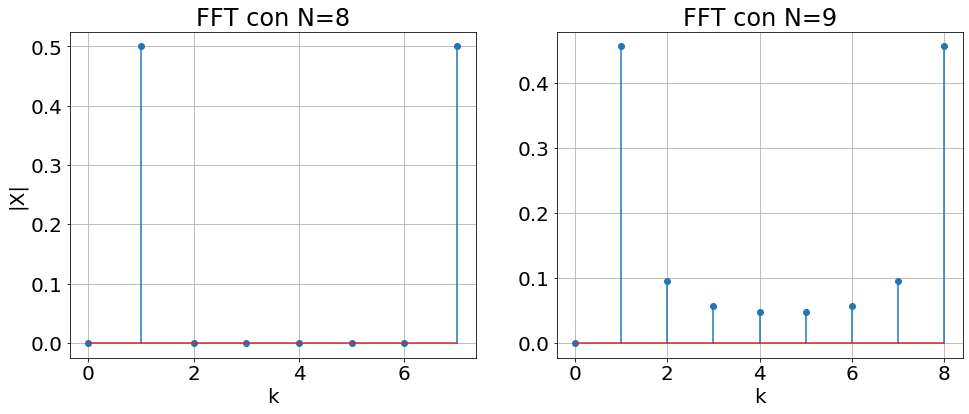

In [4]:
fig, axs = plt.subplots(1, 2 ,figsize=(16, 6) )
for i in range(2):
    axs[i].stem(  np.abs(X[i]) )
    axs[i].set_xlabel( 'k' )
    axs[i].set_title( 'FFT con N='+str( N[i] ) )
    axs[i].grid()
axs[0].set_ylabel( '|X|' )
plt.savefig('./Img/punto_1_c.png')

## d)

In [5]:
Ns = [ 16, 24, 160 ]
transformadas = calcular_fft( x, Ns )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performan

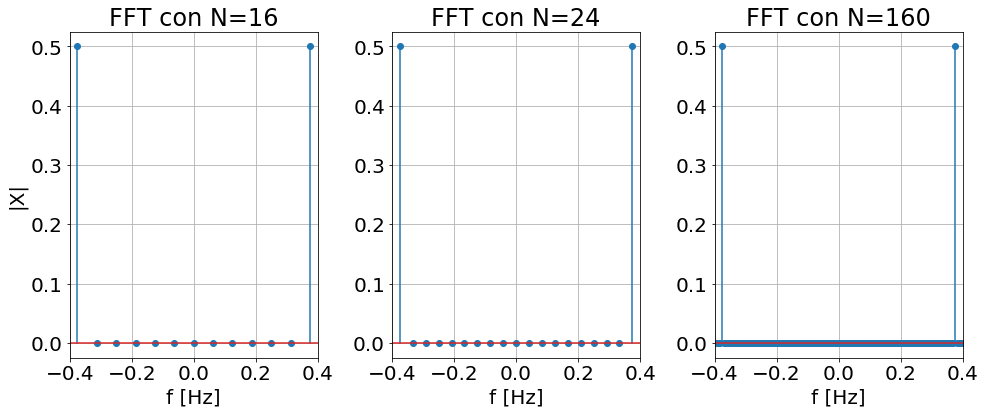

In [6]:
fig = plt.figure( figsize=( 16, 6 ) )
plt.subplots_adjust( hspace=.7, wspace=.3 )
axs = fig.subplots( 1, len(Ns) )
for i in range( len(Ns) ):
    N = transformadas['Ns'][i]
    axs[i].stem( transformadas['freq'][i] ,np.abs(transformadas['X'][i]) )
    axs[i].set_xlabel( 'f [Hz]' )
    axs[i].grid()
    axs[i].set_xlim( [ -0.4, 0.4 ] )
    axs[i].set_title( f'FFT con N={ N }' )
axs[0].set_ylabel( '|X|' )
    
plt.savefig( './Img/punto_1_d.png' )

## e)

In [7]:
Ns = [ 17, 25, 161 ]
transformadas = calcular_fft( x, Ns )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performan

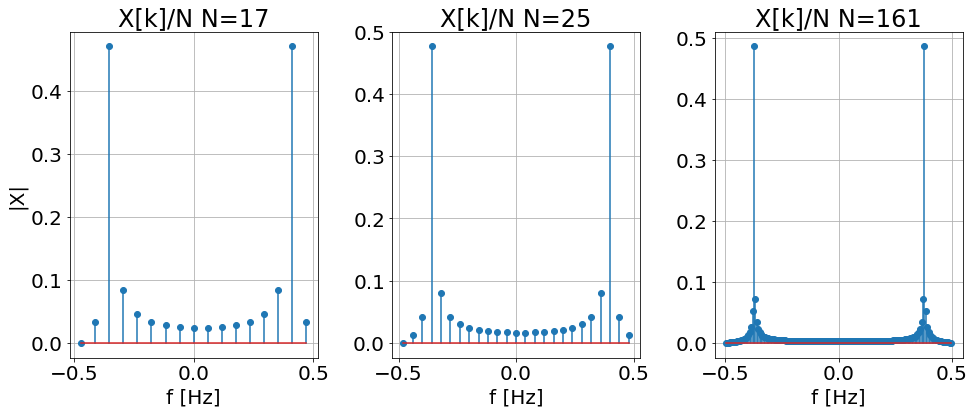

In [8]:
fig = plt.figure( figsize=( 16,6 ) )
plt.subplots_adjust( hspace=.7, wspace=.3 )
axs = fig.subplots( 1, 3 )
for i in range( 3 ):
    N = transformadas['Ns'][i]
    axs[i].stem( transformadas['freq'][i] ,np.abs(transformadas['X'][i]) )
    axs[i].set_xlabel( 'f [Hz]' )
    axs[i].grid()
    axs[i].set_title( f'X[k]/N N={ N }' )
axs[0].set_ylabel( '|X|' )
plt.savefig( './Img/punto_1_e.png' )

## g)

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


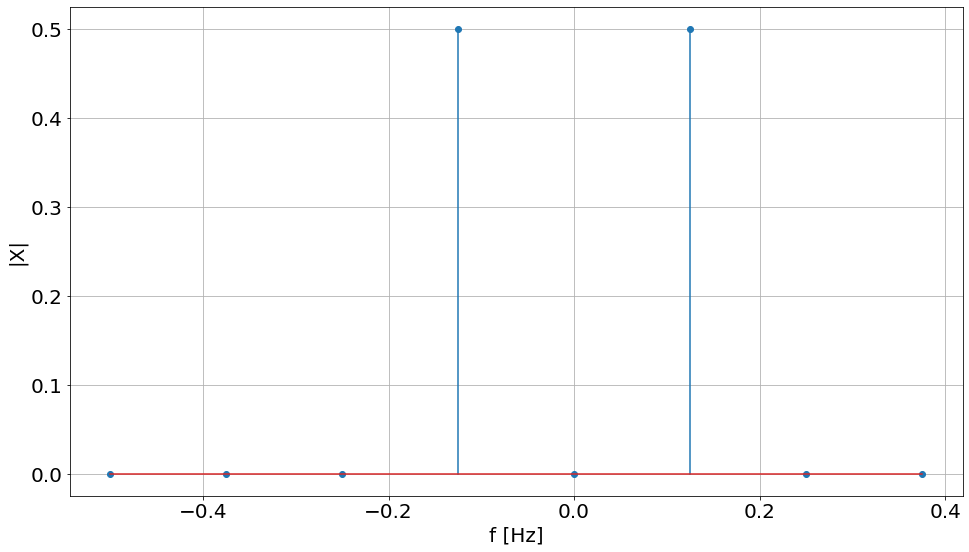

In [9]:
N = 8
X = calcular_fft( x, N )

plt.stem( X['freq'], np.abs(X['shift_X']) )
plt.grid()
plt.xlabel( 'f [Hz]' )
plt.ylabel( '|X|' )
plt.savefig('./Img/punto_1_g_a.png')

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


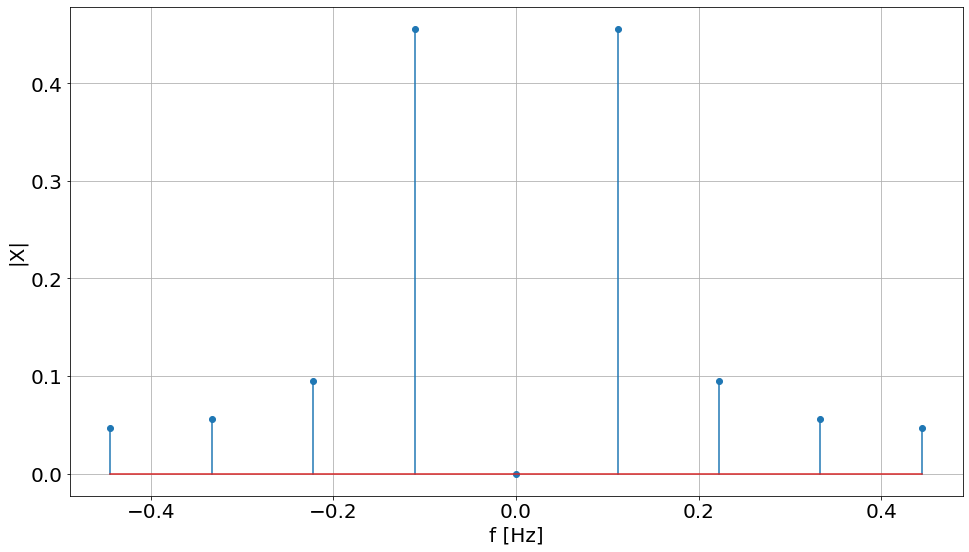

In [10]:
N = 9
X = calcular_fft( x, N )
plt.stem( X['freq'], np.abs(X['shift_X']) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( '|X|' )
plt.grid()
plt.savefig('./Img/punto_1_g_b.png')

## h)

In [11]:
escalon = lambda n: np.piecewise( n, n>-0.10, [1,0] )
delta = lambda n: np.piecewise( n, n==0, [1,0] )

x_1 = lambda n: np.sin( 2* np.pi *n /7 ) + 2 * np.cos( 4 * np.pi * n / 7 ) + 3 * np.sin( 6*np.pi*n/7 )
x_2 = lambda n: np.sum( [escalon( n + 2 - 10*k ) * escalon( 2 - n + 10*k ) for k in range( -100, 100 ) ], axis=0 )
x_3 = lambda n: np.sum( [delta( n - 3 - 20*k ) for k in range( -100, 100 ) ], axis=0 )

In [12]:
def graficar_fft( x, N, path=None ):
    resultado = calcular_fft( x, N )
    X = resultado['shift_X']
    f = resultado['freq']
    
    fig, axs = plt.subplots( 1, 2, figsize=( 16, 8 ) )
    plt.subplots_adjust( hspace=.7, wspace=.3 )
    
    axs[0].stem( f, np.abs( X ) )
    axs[0].set_xlabel( 'f [Hz]' )
    axs[0].set_ylabel( '|X|' )
    axs[0].grid()
    axs[1].stem( f, np.angle( X ) )
    axs[1].set_xlabel( 'f [Hz]' )
    axs[1].set_ylabel( 'arg(X)' )
    axs[1].grid()
    if( path ):
        plt.savefig( path )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


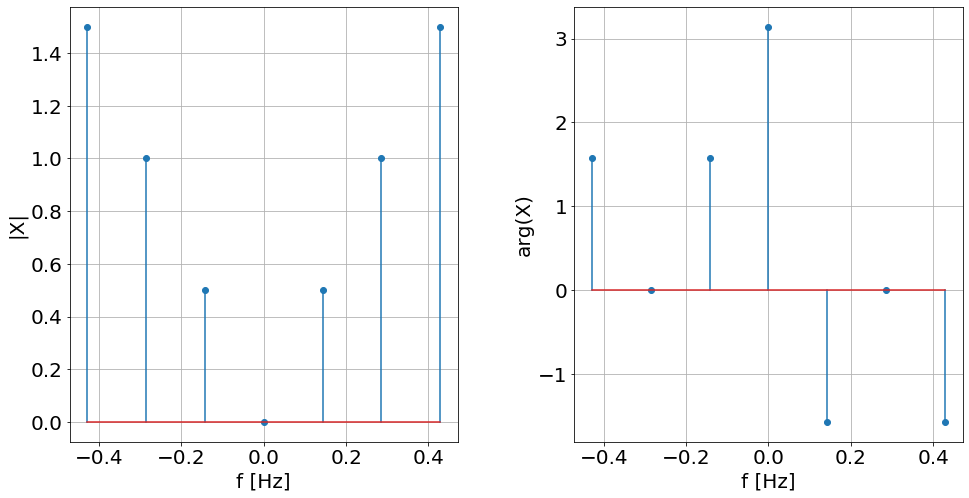

In [13]:
graficar_fft( x_1, 7, './Img/punto_1_h_1.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


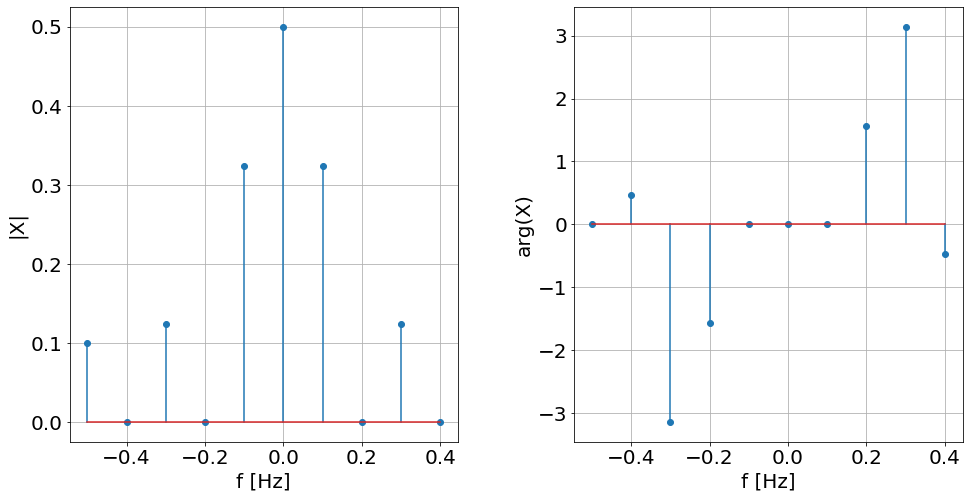

In [14]:
graficar_fft( x_2, 10, './Img/punto_1_h_2.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


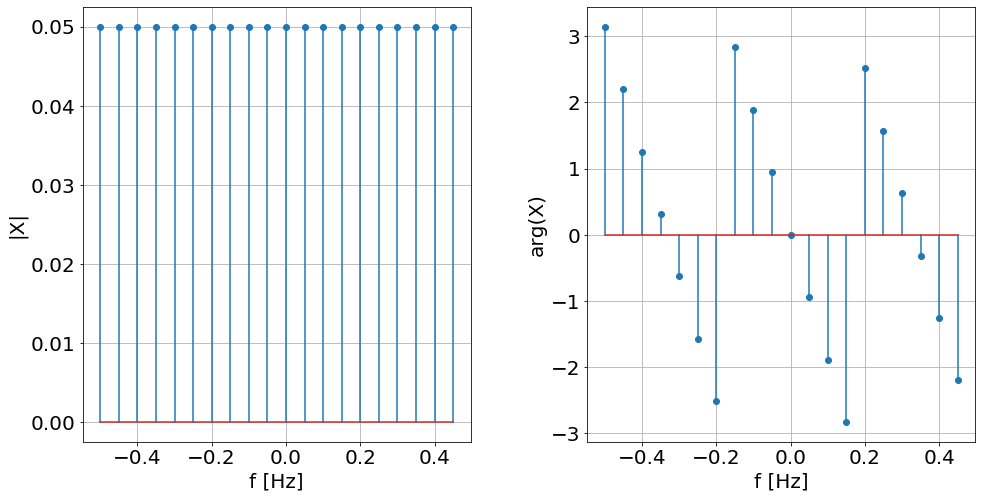

In [15]:
graficar_fft( x_3, 20, './Img/punto_1_h_3.png' )

## Graficos extras

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


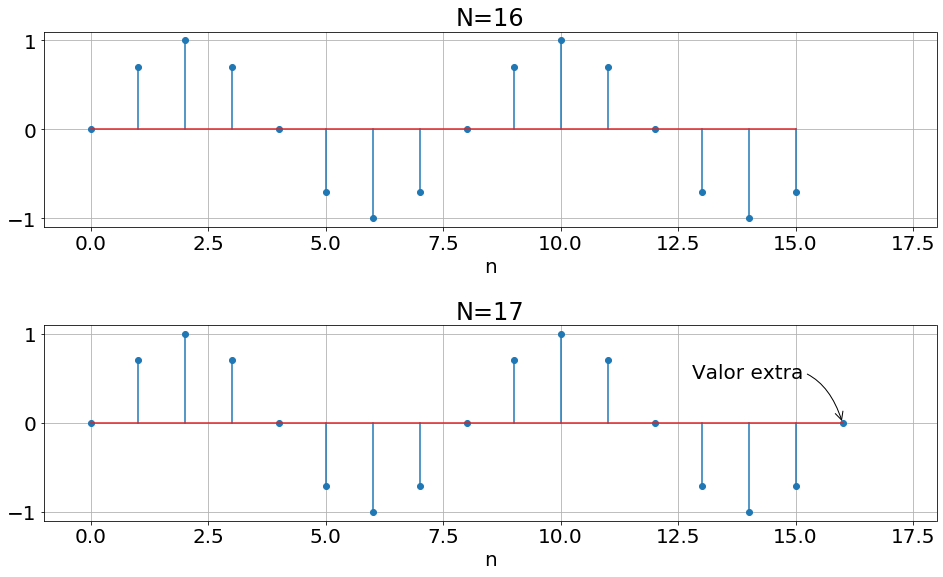

In [16]:
fig, axs = plt.subplots( 2,1 )
plt.subplots_adjust( hspace=.5 )
n_1 = np.arange( 0, 16, 1 )
n_2 = np.arange( 0, 17, 1 )

axs[0].stem( n_1, x(n_1) )
axs[0].set_xlabel( 'n' )
axs[0].set_title( 'N=16' )
axs[0].grid()
axs[0].set_xlim( [-1, 18] )
axs[1].stem( n_2, x(n_2) )
axs[1].set_xlabel( 'n' )
axs[1].set_title( 'N=17' )
axs[1].grid()
axs[1].set_xlim( [-1, 18] )
axs[1].annotate( 'Valor extra' ,xy=( 16, x(16) ), xytext=(16*.8, x(16) +.5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.5") )

plt.savefig( './Img/punto_1_dato_de_mas.png' )